In [66]:
import pandas as pd
import numpy as np
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df.shape

(768, 9)

In [29]:
df.Outcome.value_counts()
#0 = doesn't have diabetes, 1 = has diabetes

0    500
1    268
Name: Outcome, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
y = df.Outcome   #variable label
x = df.loc[:, df.columns != 'Outcome']   #features, the x variables
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)  #75% in the train, 25% in the test


In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()  # model is called logreg, this creates the model

#max iteration = number of trials your ML function is going to try and minimize cost function
#fit_intercept = True, means B exist in the equation
#fit_intercept = False, means forcing B bias to be 0, not going to have intercept in the equation, bias is not in equation
#class weight = favor certain class more than another

In [83]:
#fit the model using training data

logreg.fit(x_train, y_train)
#fit_intercept = forces to find new weights without the intercept, if you don't want bias into the equation
#class_weight = i care to make sure outcome = true is more accurate than outcome equal false, ex: care more for person who has diabetes vs one who does not, model puts more 
#emphasis for outcome = 1 over less accuracy for model predicting 0, for 1 class over another

/Users/anthonyhsu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
# find out how good model is
logreg.score(x_train, y_train) #model.predict(x_train) then compare prediction to the real labels of the training, compare predictions to y_train, tell you how many of were right which is accuracy


0.7795138888888888

In [85]:
logreg.score(x_test, y_test)

0.796875

In [35]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
220,0,177,60,29,478,34.6,1.072,21
52,5,88,66,21,23,24.4,0.342,30
108,3,83,58,31,18,34.3,0.336,25
487,0,173,78,32,265,46.5,1.159,58
661,1,199,76,43,0,42.9,1.394,22
...,...,...,...,...,...,...,...,...
183,5,73,60,0,0,26.8,0.268,27
464,10,115,98,0,0,24.0,1.022,34
34,10,122,78,31,0,27.6,0.512,45
580,0,151,90,46,0,42.1,0.371,21


In [36]:
#how do i predict a piece of data? give it x_test, should give a prediction for each row

logreg.predict(x_test)
pred = logreg.predict(x_test)
pred


array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [37]:
prob = logreg.predict_proba(x_test)
prob
#1st part probability of being 0, 2nd part probability of being 1, add both columns up will always be 1
#for people with scores of .50 and .50, those predictions not that confident so ask them to go to a doctor

array([[0.2803714 , 0.7196286 ],
       [0.948617  , 0.051383  ],
       [0.91599079, 0.08400921],
       [0.03513273, 0.96486727],
       [0.02666566, 0.97333434],
       [0.87204956, 0.12795044],
       [0.77196421, 0.22803579],
       [0.85213715, 0.14786285],
       [0.95256241, 0.04743759],
       [0.44660311, 0.55339689],
       [0.86379534, 0.13620466],
       [0.9198428 , 0.0801572 ],
       [0.92228972, 0.07771028],
       [0.72135127, 0.27864873],
       [0.69093465, 0.30906535],
       [0.25387025, 0.74612975],
       [0.75061468, 0.24938532],
       [0.92207174, 0.07792826],
       [0.86032923, 0.13967077],
       [0.98210902, 0.01789098],
       [0.92670769, 0.07329231],
       [0.62156039, 0.37843961],
       [0.92573287, 0.07426713],
       [0.52740271, 0.47259729],
       [0.27852816, 0.72147184],
       [0.91557753, 0.08442247],
       [0.33275849, 0.66724151],
       [0.08332847, 0.91667153],
       [0.8709982 , 0.1290018 ],
       [0.84863156, 0.15136844],
       [0.

In [38]:
results = pd.DataFrame(prob)
results['predict'] = pred
results['actual_label'] = y_test.tolist()
results
#shows probabilities, predictions, and actual answers next to each other

,0,1,predict,actual_label
0,0.280371,0.719629,1,1
1,0.948617,0.051383,0,0
2,0.915991,0.084009,0,0
3,0.035133,0.964867,1,0
4,0.026666,0.973334,1,1
...,...,...,...,...
187,0.966435,0.033565,0,0
188,0.742739,0.257261,0,0
189,0.612495,0.387505,0,0
190,0.434231,0.565769,1,1


In [39]:
y_test

220    1
52     0
108    0
487    0
661    1
      ..
183    0
464    0
34     0
580    1
361    0
Name: Outcome, Length: 192, dtype: int64

In [40]:
results[results.predict!=results.actual_label] #shows everywhere were your prediction didn't match the actual_label/result

,0,1,predict,actual_label
3,0.035133,0.964867,1,0
6,0.771964,0.228036,0,1
7,0.852137,0.147863,0,1
21,0.621560,0.378440,0,1
27,0.083328,0.916672,1,0
28,0.870998,0.129002,0,1
29,0.848632,0.151368,0,1
36,0.449181,0.550819,1,0
42,0.800915,0.199085,0,1
49,0.633123,0.366877,0,1


In [41]:
logreg.coef_ #this will find out the W's or weights of your equation model  

#x is the features, w is the weights, b is the bias

array([[ 5.98923493e-02,  3.74302000e-02, -1.15886805e-02,
         1.00800553e-03, -1.63304650e-03,  9.01178431e-02,
         1.18514022e+00,  3.24914035e-02]])

In [42]:
logreg.intercept_ #this gives the B or bias of the equation model

array([-9.30670758])

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
model_scaled=LogisticRegression()
model_scaled.fit(x_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
model_scaled.score(x_train_scaled, y_train)  #training accuracy didn't change that much so scaling didn't really affect accuracy, but 

#it did effect the coefficients, as coefficents are completely data


0.7760416666666666

In [45]:
model_scaled.coef_  #these coefficients here are for the scaled data, or the Ws of the scaled data, these coeffic represent the true importance of the data

array([[ 0.19833745,  1.17975057, -0.21493333,  0.02298948, -0.18061092,
         0.71652708,  0.32553756,  0.3837584 ]])

<BarContainer object of 8 artists>

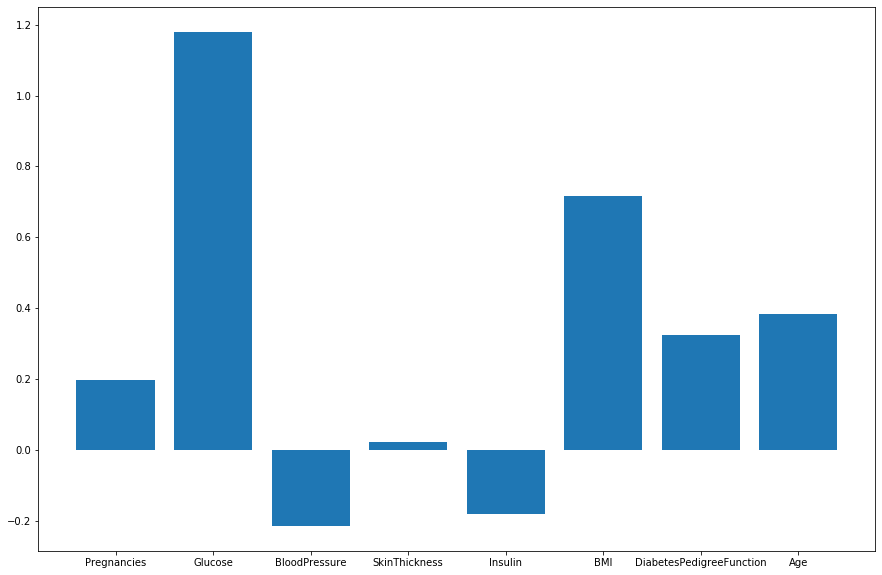

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.bar(x_train.columns, model_scaled.coef_[0])

#blood pressure and insulin are inversely related to your susceptibility to get diabetes
#glucose, pregnancies, and bmi are correlated/ more susceptible to get diabetes

#you must scale your data of the coefficients W, to get the true importance of each coefficient and then plot the data to see it visually

Lecture 4 Notes 4.28.20

In [76]:
pred = logreg.predict(x_test)
prob = logreg.predict_proba(x_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1])

(array([33.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

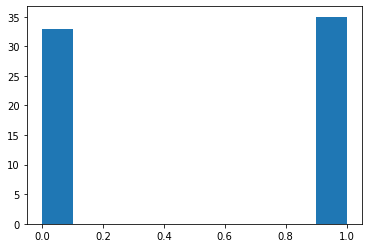

In [48]:
plt.hist(pred[y_test==1]) 
#histogram for my pred of points that was actually labeled as positive, 
#blue points/bars represent True positive and false negatives
#Blue left bar represents False Negatives
#blue right points/bar represent True Positives


(array([112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  12.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

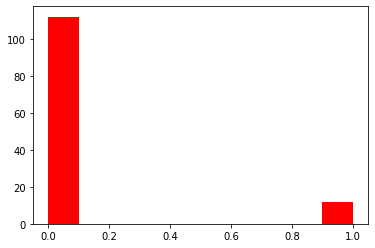

In [49]:
plt.hist(pred[y_test==0], color = 'r') 
#red bars/points represents true negatives and false positives,
#red points represent truly negative and false positives,
#red left bar is True Negatives
#red right bar is False Positives

#better model has bars 1 (False Neg) and 4 (False Pos) smaller and decreasing and bars 2 (True pos) and 3 (True Negb) to be higher or increasing

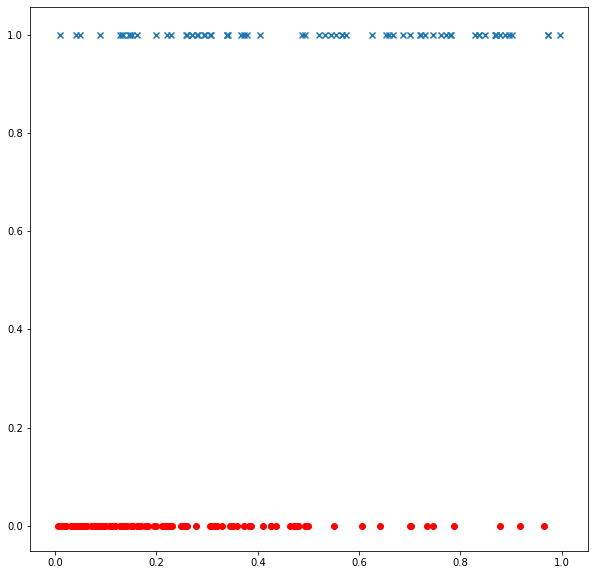

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(prob[y_test==1,1],y_test[y_test==1], marker='x')
plt.scatter(prob[y_test==0,1],y_test[y_test==0], marker='o', c='r')

#x axis is from 0 to 1
# more blue points toward the right and red points towards the left is the model that wins
# want red points to have low probability towards 0, want blue points high probability towards 1

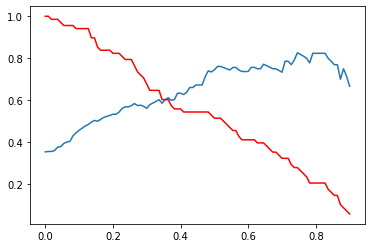

In [67]:
from sklearn import metrics

threshold=np.linspace(0,0.9,100)
precision_list=[]
recall_list=[]
for i in threshold:
    my_pred=prob[:,1]>=i
    precision_list.append(metrics.precision_score(y_test,my_pred))
    recall_list.append(metrics.recall_score(y_test,my_pred))
plt.plot(threshold,precision_list)
plt.plot(threshold, recall_list, c='r')

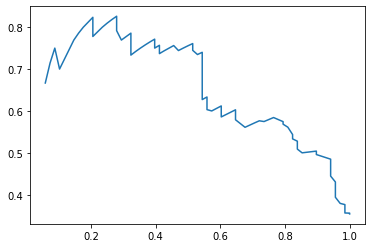

In [68]:
# precision recall curve, the higher/more area under the curve the better

plt.plot(recall_list,precision_list)

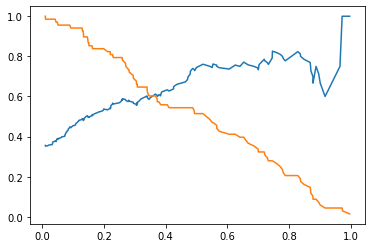

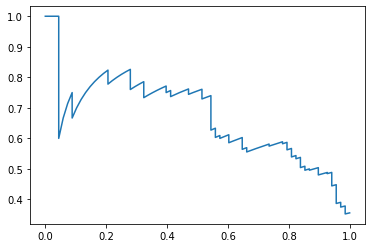

In [69]:
prec,rec,th=metrics.precision_recall_curve(y_test,prob[:,1])
plt.plot(th,prec[:-1])
plt.plot(th,rec[:-1])
plt.figure()
plt.plot(rec,prec)

#as precision increases, recall decreases

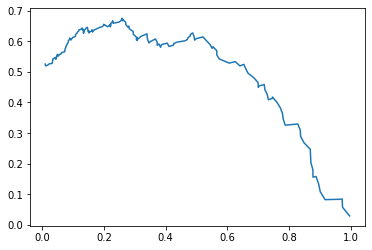

In [71]:
#f1 score is highest point
#want to operate at a threshold of 0.4, for balance between prec and rec

f1=2*prec*rec/(prec+rec)
plt.plot(th,f1[:-1])

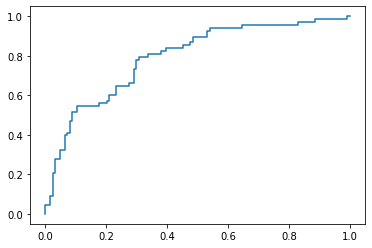

In [79]:
#better model would have higher curve

fpr,tpr,thre=metrics.roc_curve(y_test, prob[:,1]) #true labels, prob
plt.plot(fpr,tpr)

In [80]:
metrics.auc(fpr,tpr) # want auc to be higher

0.7921015180265654

In [ ]:
#the highest F1 score is the point that gives you the best precision and recall, optimal is precision and recall are both medium
#point with highest F1 score wins